# Geospatial Analysis
##### Asian Institute of Management (2019)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx

ox.config(log_file=True, log_console=True, use_cache=True)

In [2]:
city = ox.gdf_from_place('Makati City, Metro Manila, Philippines')
# OSMNx uses Nominatim for Geocoding

In [3]:
city

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,121.020259,14.559177,14.559077,121.020159,POINT (121.0202094 14.5591272),"Makati City., 122, Valero, Salcedo, Bel-Air, M..."


In [4]:
city = ox.gdf_from_place({
    'city': 'Makati City',
    'country': 'Philippines'
})

In [5]:
city

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,121.047012,14.579432,14.529634,120.998767,"POLYGON ((120.9987668 14.5617588, 120.9989044 ...","Makati 1st District, Makati, Metro Manila, Phi..."


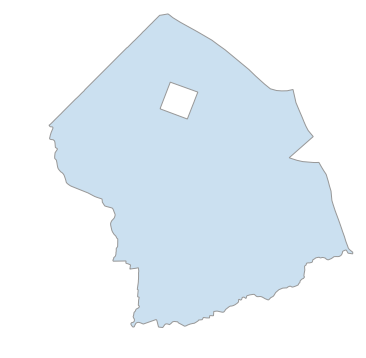

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a587d30>)

In [6]:
ox.plot_shape(city)

In [7]:
roads = ox.graph_from_polygon(city['geometry'].iloc[0])

In [8]:
type(roads)

networkx.classes.multidigraph.MultiDiGraph

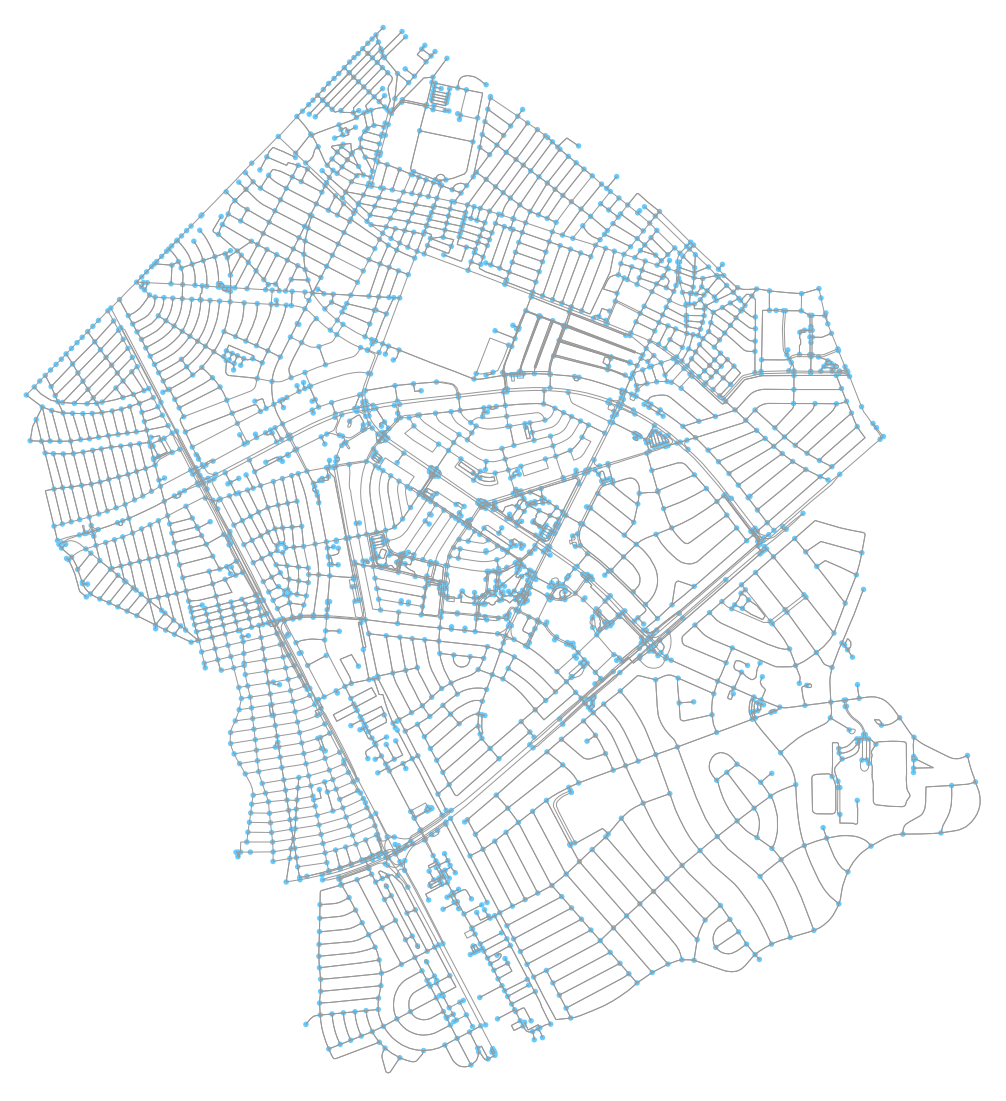

In [9]:
fig, ax = ox.plot_graph(roads, fig_height=20, node_size=30)

In [10]:
road_aim = ox.graph_from_point(
    [14.55244062290, 121.018802116885],
    distance=500
)

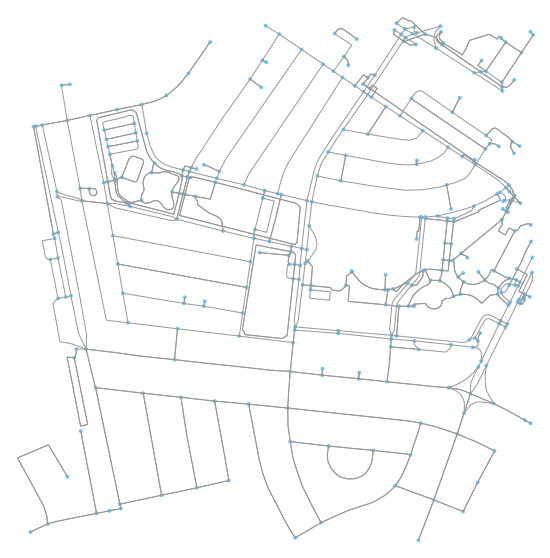

(<Figure size 733.886x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c00cc50>)

In [11]:
ox.plot_graph(road_aim, fig_height=10)

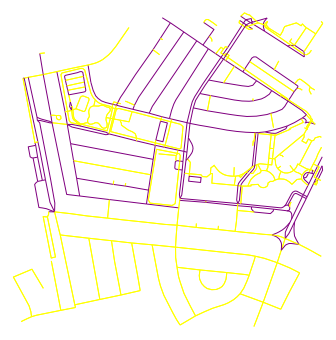

(<Figure size 440.331x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2db91438>)

In [12]:
# Color each edge based on category
ec = ['purple' if data['oneway'] else 'yellow'
      for u, v, key, data in road_aim.edges(keys=True, data=True)]
ox.plot_graph(road_aim, node_size=0, edge_color=ec)

In [13]:
nodes, edges = ox.graph_to_gdfs(road_aim)

In [14]:
edges.head()

,access,bridge,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,service,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (121.0203981 14.5558943, 121.020481...",steps,0,NaN,15.244,NaN,NaN,False,35799386,NaN,NaN,418553906,418553907,NaN
1,NaN,yes,"LINESTRING (121.0203981 14.5558943, 121.020515...",footway,0,NaN,14.905,NaN,Ayala Center Pedestrian Link Bridge,False,164699682,NaN,NaN,418553906,345517527,NaN
2,NaN,NaN,"LINESTRING (121.0204818 14.5560049, 121.020398...",steps,0,NaN,15.244,NaN,NaN,False,35799386,NaN,NaN,418553907,418553906,NaN
3,NaN,NaN,"LINESTRING (121.0204818 14.5560049, 121.020404...","[steps, footway]",0,NaN,36.548,NaN,NaN,False,"[35799386, 45319430]",NaN,NaN,418553907,1772634582,NaN
4,NaN,NaN,"LINESTRING (121.0204818 14.5560049, 121.020533...","[steps, footway]",0,NaN,17.514,NaN,NaN,False,"[45319426, 35799387]",NaN,NaN,418553907,1772634583,NaN


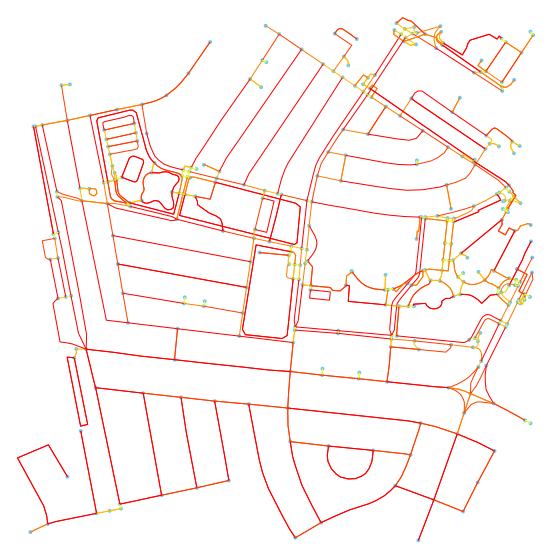

(<Figure size 733.886x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2badf5c0>)

In [15]:
# Color each edge using an attribute value
ec = ox.get_edge_colors_by_attr(road_aim, attr='length',
                                cmap='autumn_r')
ox.plot_graph(road_aim, edge_color=ec, fig_height=10)

In [16]:
ox.basic_stats(road_aim)

{'n': 342,
 'm': 746,
 'k_avg': 4.362573099415204,
 'intersection_count': 306,
 'streets_per_node_avg': 3.0116959064327484,
 'streets_per_node_counts': {0: 0,
  1: 36,
  2: 4,
  3: 231,
  4: 64,
  5: 6,
  6: 0,
  7: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.10526315789473684,
  2: 0.011695906432748537,
  3: 0.6754385964912281,
  4: 0.1871345029239766,
  5: 0.017543859649122806,
  6: 0.0,
  7: 0.0029239766081871343},
 'edge_length_total': 41568.167000000016,
 'edge_length_avg': 55.72140348525471,
 'street_length_total': 27458.304,
 'street_length_avg': 56.61505979381443,
 'street_segments_count': 485,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.1391770617225256,
 'self_loop_proportion': 0.00938337801608579,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [17]:
ox.extended_stats(road_aim, connectivity=True,
                  anc=True, ecc=True, bc=True, cc=True)

{'avg_neighbor_degree': {418553906: 3.0,
  418553907: 2.0,
  313868365: 3.0,
  4507869292: 2.0,
  4507869291: 1.5,
  303808738: 4.0,
  303808744: 3.0,
  303808748: 3.0,
  354320640: 1.0,
  354320645: 2.0,
  354320683: 1.0,
  354320714: 1.0,
  354320721: 3.0,
  354320744: 1.5,
  242418058: 2.0,
  243204561: 2.0,
  1772634582: 2.0,
  1772634583: 2.5,
  1772634584: 2.5,
  420315649: 2.0,
  420315650: 2.0,
  420315651: 2.0,
  420315653: 2.0,
  420315664: 1.0,
  1021493811: 2.5,
  1021493835: 2.5,
  243204754: 1.5,
  21717782: 2.0,
  21717785: 2.3333333333333335,
  1068778280: 2.0,
  1068778294: 2.0,
  303809341: 1.0,
  303809358: 1.0,
  303809512: 0.0,
  2299216968: 1.6666666666666667,
  2299216970: 1.5,
  2662909135: 3.5,
  2662909138: 3.3333333333333335,
  2662909142: 3.5,
  419480800: 2.6666666666666665,
  419480801: 1.6666666666666667,
  419480802: 2.3333333333333335,
  419480804: 3.0,
  316974315: 2.0,
  242853101: 2.5,
  676768142: 2.75,
  676768145: 3.3333333333333335,
  33441286: 3

In [18]:
estats = _

In [19]:
estats.keys()

dict_keys(['avg_neighbor_degree', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree', 'avg_weighted_neighbor_degree_avg', 'degree_centrality', 'degree_centrality_avg', 'clustering_coefficient', 'clustering_coefficient_avg', 'clustering_coefficient_weighted', 'clustering_coefficient_weighted_avg', 'pagerank', 'pagerank_max_node', 'pagerank_max', 'pagerank_min_node', 'pagerank_min', 'node_connectivity', 'edge_connectivity', 'node_connectivity_avg', 'eccentricity', 'diameter', 'radius', 'center', 'periphery', 'closeness_centrality', 'closeness_centrality_avg', 'betweenness_centrality', 'betweenness_centrality_avg'])

In [20]:
max_node, max_value = max(estats['betweenness_centrality'].items(),
                          key=lambda x: x[1])
print(max_node, max_value)

1406177349 0.2280266937007729


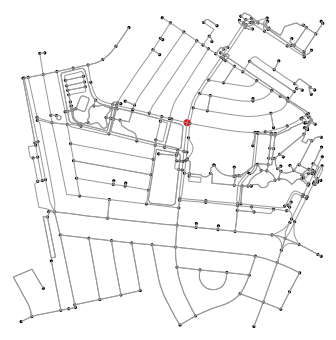

(<Figure size 440.331x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2bb10978>)

In [21]:
nc = ['r' if node == max_node 
      else '#000000' for node in road_aim.nodes()]
ns = [50 if node == max_node else 10 for node in road_aim.nodes()]

ox.plot_graph(road_aim, node_size=ns, node_color=nc)

In [22]:
import psycopg2

In [23]:
conn = psycopg2.connect(host='127.0.0.1', port=5432, user='edavid', dbname='edavid')

In [24]:
places_poly = gpd.read_postgis('''
SELECT name, ST_Centroid(wkb_geometry) AS geom
FROM multipolygons
WHERE name = 'Asian Institute of Management'
OR name = 'Manila South Cemetry'
ORDER BY name ASC
''', conn)

In [25]:
places_poly

,name,geom
0,Asian Institute of Management,POINT (121.0188021168846 14.552440622908)
1,Manila South Cemetry,POINT (121.0194096433444 14.56568005333256)


In [26]:
aim_node = ox.get_nearest_node(roads,
                               (places_poly['geom'].y[0],
                                places_poly['geom'].x[0])
                              )
msc_node = ox.get_nearest_node(roads,
                               (places_poly['geom'].y[1],
                                places_poly['geom'].x[1])
                              )

In [27]:
print(aim_node, msc_node)

6292477505 25584075


In [38]:
route = nx.shortest_path(roads, aim_node, msc_node)
path_length = nx.shortest_path_length(roads, aim_node, msc_node)

print(len(route), path_length)

28 27


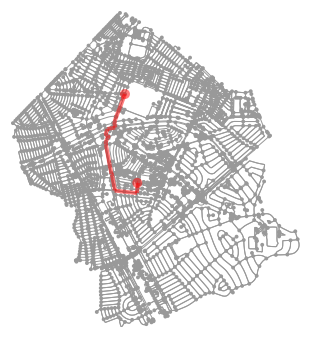

(<Figure size 407.245x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2b7903c8>)

In [39]:
ox.plot_graph_route(roads, route)

In [40]:
route = nx.shortest_path(roads, aim_node, msc_node, weight='length')
path_length = nx.shortest_path_length(roads, aim_node, msc_node, weight='length')

print(len(route), path_length)

36 2021.2600000000002


In [29]:
# retrieve the attributes of a single edge
roads.get_edge_data(route[0], route[1])

{0: {'osmid': 671956283,
  'highway': 'footway',
  'oneway': False,
  'length': 27.319}}

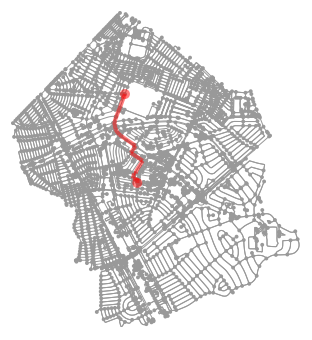

(<Figure size 407.245x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2b885c88>)

In [43]:
ox.plot_graph_route(roads, route)